In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [ ]:
Uploaded = files.upload()

Saving cars.csv to cars (4).csv


In [ ]:
df = pd.read_csv("cars.csv")

In [ ]:
df.head()

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000


In [ ]:
df["brand"].value_counts(), df["brand"].value_counts().shape

(brand
 Maruti           2448
 Hyundai          1415
 Mahindra          772
 Tata              734
 Toyota            488
 Honda             467
 Ford              397
 Chevrolet         230
 Renault           228
 Volkswagen        186
 BMW               120
 Skoda             105
 Nissan             81
 Jaguar             71
 Volvo              67
 Datsun             65
 Mercedes-Benz      54
 Fiat               47
 Audi               40
 Lexus              34
 Jeep               31
 Mitsubishi         14
 Land                6
 Force               6
 Isuzu               5
 Ambassador          4
 Kia                 4
 MG                  3
 Daewoo              3
 Ashok               1
 Opel                1
 Peugeot             1
 Name: count, dtype: int64,
 (32,))

In [ ]:
df["fuel"].value_counts(), df["fuel"].value_counts().shape

(fuel
 Diesel    4402
 Petrol    3631
 CNG         57
 LPG         38
 Name: count, dtype: int64,
 (4,))

In [ ]:
df["owner"].value_counts(), df["owner"].value_counts().shape

(owner
 First Owner             5289
 Second Owner            2105
 Third Owner              555
 Fourth & Above Owner     174
 Test Drive Car             5
 Name: count, dtype: int64,
 (5,))

# Train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 0:4],
df.iloc[:, -1], test_size = 0.3)

In [ ]:
X_train.head()

,brand,km_driven,fuel,owner
2390,Maruti,110000,Diesel,First Owner
3131,Mahindra,120000,Diesel,Second Owner
7388,Maruti,80000,Petrol,First Owner
521,Maruti,30000,Petrol,First Owner
5593,Chevrolet,136000,Diesel,Second Owner


In [ ]:
X_test.head()

,brand,km_driven,fuel,owner
4747,Honda,8576,Petrol,First Owner
7114,Maruti,72000,Petrol,Second Owner
5300,Mahindra,125000,Diesel,Second Owner
7446,Maruti,54000,Diesel,Second Owner
2191,Hyundai,13887,Petrol,First Owner


In [ ]:
y_train.head()

,selling_price
2390,525000
3131,180000
7388,110000
521,450000
5593,355000


In [ ]:
y_test.head()

,selling_price
4747,680000
7114,350000
5300,330000
7446,725000
2191,950000


# Ordinal Encoding for Owner Column

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
oe = OrdinalEncoder(categories = [["Test Drive Car", "Fourth & Above Owner", "Third Owner", "Second Owner", "First Owner"]])

In [ ]:
oe.fit(X_train[['owner']])

OrdinalEncoder(categories=[['Test Drive Car', 'Fourth & Above Owner',
                            'Third Owner', 'Second Owner', 'First Owner']])

In [ ]:
X_train['owner'] = oe.fit_transform(X_train[['owner']])
X_test['owner'] = oe.transform(X_test[['owner']])

In [ ]:
X_train.head()

,brand,km_driven,fuel,owner
2390,Maruti,110000,Diesel,4.0
3131,Mahindra,120000,Diesel,3.0
7388,Maruti,80000,Petrol,4.0
521,Maruti,30000,Petrol,4.0
5593,Chevrolet,136000,Diesel,3.0


In [ ]:
X_test.head()

,brand,km_driven,fuel,owner
4747,Honda,8576,Petrol,4.0
7114,Maruti,72000,Petrol,3.0
5300,Mahindra,125000,Diesel,3.0
7446,Maruti,54000,Diesel,3.0
2191,Hyundai,13887,Petrol,4.0


# Nominal Encoding for fuel column

# One Hot Encoding
 Using Pandas

In [ ]:
pd.get_dummies(df, columns=['fuel']).head()

,brand,km_driven,owner,selling_price,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol
0,Maruti,145500,First Owner,450000,False,True,False,False
1,Skoda,120000,Second Owner,370000,False,True,False,False
2,Honda,140000,Third Owner,158000,False,False,False,True
3,Hyundai,127000,First Owner,225000,False,True,False,False
4,Maruti,120000,First Owner,130000,False,False,False,True


# n-1 Columns

In [ ]:
pd.get_dummies(df, columns = ["fuel"], drop_first = True).head()

,brand,km_driven,owner,selling_price,fuel_Diesel,fuel_LPG,fuel_Petrol
0,Maruti,145500,First Owner,450000,True,False,False
1,Skoda,120000,Second Owner,370000,True,False,False
2,Honda,140000,Third Owner,158000,False,False,True
3,Hyundai,127000,First Owner,225000,True,False,False
4,Maruti,120000,First Owner,130000,False,False,True


# OneHotEncoding Using Sci-kit learn on Fuel Column on X_train

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder(drop = 'first', sparse_output=False, dtype = np.int32)

In [ ]:
ohe.fit(X_train[['fuel']])

OneHotEncoder(drop='first', dtype=<class 'numpy.int32'>, sparse_output=False)

In [ ]:
fuel_encoded = ohe.transform(X_train[['fuel']])
fuel_encoded2 = ohe.transform(X_test[['fuel']])

In [ ]:
fuel_encoded

array([[1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0]], dtype=int32)

In [ ]:
# Step 2: Convert the encoded array to DataFrame
fuel_encoded_df = pd.DataFrame(
    fuel_encoded,
    columns=ohe.get_feature_names_out(['fuel']),
    index=X_train.index  # Use index from the original X_train DataFrame
)

In [ ]:
fuel_encoded_df2 = pd.DataFrame(fuel_encoded2,
columns = ohe.get_feature_names_out(['fuel']),
 index = X_test.index
)

In [ ]:
fuel_encoded_df2.head()

,fuel_Diesel,fuel_LPG,fuel_Petrol
4747,0,0,1
7114,0,0,1
5300,1,0,0
7446,1,0,0
2191,0,0,1


In [ ]:
# Step 3: Drop original 'fuel' column
X_train = X_train.drop('fuel', axis=1)

# Step 4: Concatenate the encoded columns
X_train = pd.concat([X_train, fuel_encoded_df], axis=1)

In [ ]:
X_test = X_test.drop('fuel', axis=1)
X_test = pd.concat([X_test, fuel_encoded_df2], axis=1)

In [ ]:
X_train.head()

,brand,km_driven,owner,fuel_Diesel,fuel_LPG,fuel_Petrol
2390,Maruti,110000,4.0,1,0,0
3131,Mahindra,120000,3.0,1,0,0
7388,Maruti,80000,4.0,0,0,1
521,Maruti,30000,4.0,0,0,1
5593,Chevrolet,136000,3.0,1,0,0


In [ ]:
X_test.head()

,brand,km_driven,owner,fuel_Diesel,fuel_LPG,fuel_Petrol
4747,Honda,8576,4.0,0,0,1
7114,Maruti,72000,3.0,0,0,1
5300,Mahindra,125000,3.0,1,0,0
7446,Maruti,54000,3.0,1,0,0
2191,Hyundai,13887,4.0,0,0,1


# One Hot Encoding On Brand Column

In [ ]:
ohe2 = OneHotEncoder(drop = "first", sparse_output=False, dtype=np.int32)

In [ ]:
ohe2.fit(X_train[["brand"]])

OneHotEncoder(drop='first', dtype=<class 'numpy.int32'>, sparse_output=False)

In [ ]:
brand_encoded = ohe2.transform(X_train[["brand"]])

In [ ]:
brand_encoded2 = ohe2.transform(X_test[["brand"]])

In [ ]:
brand_encoded2

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [ ]:
# Step 2: Convert the encoded array to DataFrame
brand_encoded_df = pd.DataFrame(
    brand_encoded,
    columns=ohe2.get_feature_names_out(["brand"]),
    index=X_train.index  # Use index from the original X_train DataFrame
)

In [ ]:
brand_encoded_df2 = pd.DataFrame(
brand_encoded2, columns= ohe2.get_feature_names_out(['brand']),
index = X_test.index)

In [ ]:
brand_encoded_df.head()

,brand_Ashok,brand_Audi,brand_BMW,brand_Chevrolet,brand_Daewoo,brand_Datsun,brand_Fiat,brand_Force,brand_Ford,brand_Honda,...,brand_Mitsubishi,brand_Nissan,brand_Opel,brand_Peugeot,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
2390,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3131,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7388,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
521,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5593,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Step 3: Drop original 'brand' column
X_train = X_train.drop('brand', axis=1)

# Step 4: Concatenate the encoded columns
X_train = pd.concat([X_train, brand_encoded_df], axis=1)

In [ ]:
X_test = X_test.drop("brand", axis=1)
X_test = pd.concat([X_test, brand_encoded_df2], axis=1)

In [ ]:
X_train.head(20)

,km_driven,owner,fuel_Diesel,fuel_LPG,fuel_Petrol,brand_Ashok,brand_Audi,brand_BMW,brand_Chevrolet,brand_Daewoo,...,brand_Mitsubishi,brand_Nissan,brand_Opel,brand_Peugeot,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
2390,110000,4.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3131,120000,3.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7388,80000,4.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
521,30000,4.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5593,136000,3.0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7775,76131,4.0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4488,50000,4.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7626,60000,4.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7528,56000,2.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
311,30000,4.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_test.head()

,km_driven,owner,fuel_Diesel,fuel_LPG,fuel_Petrol,brand_Ashok,brand_Audi,brand_BMW,brand_Chevrolet,brand_Daewoo,...,brand_Mitsubishi,brand_Nissan,brand_Opel,brand_Peugeot,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
4747,8576,4.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7114,72000,3.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5300,125000,3.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7446,54000,3.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2191,13887,4.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


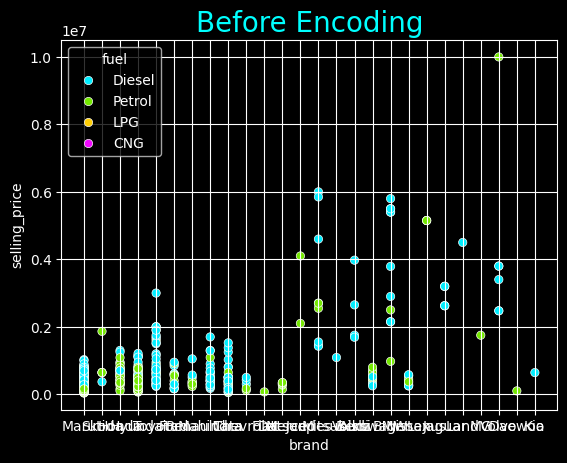

In [ ]:
sns.scatterplot(data = df.head(500)
, x="brand", y="selling_price", hue = "fuel",
palette="gist_ncar")
plt.title("Before Encoding", color="cyan", fontsize=20)
plt.grid()
plt.show()

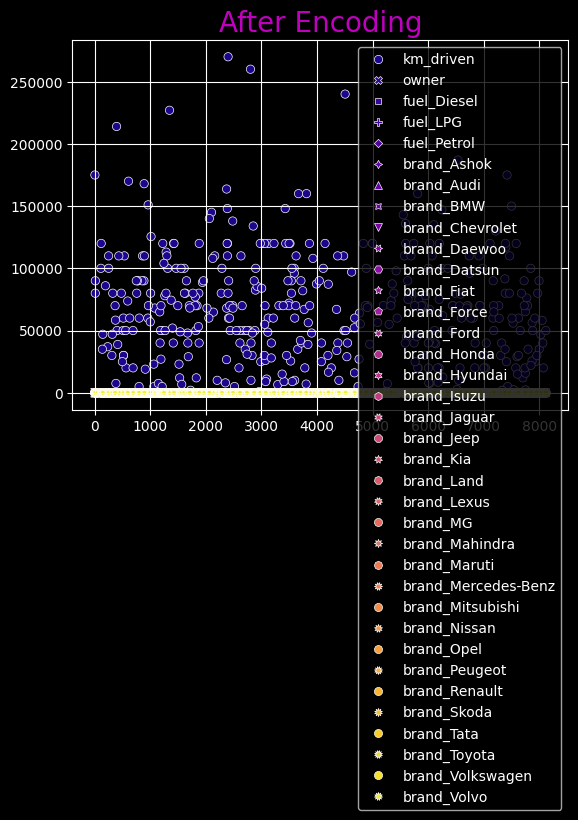

In [ ]:

plt.style.use("dark_background")
sns.scatterplot(data = X_train.head(400), palette="plasma")
plt.title("After Encoding", color ="m", fontsize=20)
plt.grid()
plt.show()